<a href="https://colab.research.google.com/github/AmitCS5/summer-of-code-2023/blob/main/machine-learning/week1/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Libraries and Dataset
I am using kaggle Dataset.This is a pre-crawled dataset, taken as subset of a bigger dataset (more than 5.8 million products) that was created by extracting data from Flipkart.com, a leading Indian eCommerce store.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import xgboost as xgb

In [3]:
raw_df = pd.read_csv('/flipkart_com-ecommerce_sample.csv')

In [4]:
print("No. of Training example :",raw_df.shape[0])
raw_df.head()


No. of Training example : 20000


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# Data Cleaning
Columns such as 'unique_id' and 'pid' have all values distinct. So, during model training they didn't help in finding pattern in dataset.Therefore, we can drop these columns.
Column  'image' contain URL of image available on flipkart website. We are building a simple regressor model based on **Boosted decision Tree** or a **Linear regression**. So we ignore image column.

In [5]:
df = raw_df.drop(columns = ['uniq_id','product_url','pid','image','description','product_specifications'])

In [6]:
df.isnull().sum()

crawl_timestamp               0
product_name                  0
product_category_tree         0
retail_price                 78
discounted_price             78
is_FK_Advantage_product       0
product_rating                0
overall_rating                0
brand                      5864
dtype: int64

Droping datapoints that contain 'NA' (Not avaliable) values.

In [7]:
df = df.dropna()
df = df.reset_index()
print("No. of Training example :",df.shape[0])
print(end = '/n')
df.isnull().sum()

No. of Training example : 14071
/n

index                      0
crawl_timestamp            0
product_name               0
product_category_tree      0
retail_price               0
discounted_price           0
is_FK_Advantage_product    0
product_rating             0
overall_rating             0
brand                      0
dtype: int64

In [8]:
print(df[['overall_rating','product_rating']].value_counts())
df = df.drop(columns = ['overall_rating','product_rating'][0:10])

overall_rating       product_rating     
No rating available  No rating available    13153
5                    5                        339
4                    4                        114
1                    1                         91
3                    3                         71
4.2                  4.2                       31
2                    2                         31
4.5                  4.5                       25
3.7                  3.7                       23
4.3                  4.3                       21
3.5                  3.5                       18
2.5                  2.5                       16
3.6                  3.6                       13
3.8                  3.8                       11
4.1                  4.1                       11
4.8                  4.8                       11
2.3                  2.3                       10
3.2                  3.2                       10
4.4                  4.4                        9
3.3      

In [9]:
df['crawl_timestamp']=pd.to_datetime(df['crawl_timestamp'])
df['crawl_year']=df['crawl_timestamp'].apply(lambda x :x.year)
df['crawl_month']=df['crawl_timestamp'].apply(lambda x :x.month)

Above Analysis shows that there are 13140 (about **93.5%**) training examples that are not rated. Instead of droping training example that are not rated, we drop column 'overall_rating' and 'product_rating'.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14071 entries, 0 to 14070
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    14071 non-null  int64              
 1   crawl_timestamp          14071 non-null  datetime64[ns, UTC]
 2   product_name             14071 non-null  object             
 3   product_category_tree    14071 non-null  object             
 4   retail_price             14071 non-null  float64            
 5   discounted_price         14071 non-null  float64            
 6   is_FK_Advantage_product  14071 non-null  bool               
 7   brand                    14071 non-null  object             
 8   crawl_year               14071 non-null  int64              
 9   crawl_month              14071 non-null  int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 1003.2+ KB


# Exploratory Data Analysis


Let's investigate the number of distinct brands and how frequently they appear in the dataset.

In [11]:
All_brand = df['brand'].value_counts()
print("Unique Brand :",All_brand.shape[0])

Unique Brand : 3485


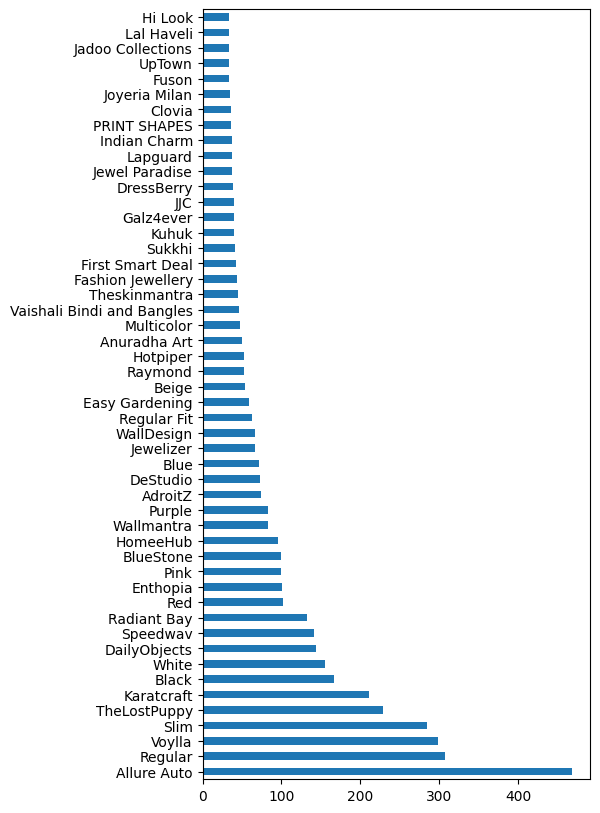

In [12]:
plt.figure(figsize= (5,10))
All_brand.sort_values(ascending=False)[:50].plot(kind = 'barh')
plt.show()

 **We have limited amount of data and having many categories in a feature result in overfitting. One-hot encoding can significantly increase the dimensionality of the feature space, resulting in a large number of columns (3480 new columns). Therefore we are using integer coding.**


In [13]:
df['brand'] = pd.factorize(df['brand'])[0]

Analyze product_category_tree column.

In [14]:
df.loc[8911,'product_category_tree']

'["Clothing >> Women\'s Clothing >> Western Wear >> Shirts, Tops & Tunics >> Shirts >> Wisstler Shirts"]'

**Abstracting Category and subcategory of product from product_category_tree.**

In [15]:
print("Category :",df.product_category_tree[1956].split('>>')[0].strip('.[]"').strip())
print("SubCategory :",df.product_category_tree[1956].split('>>')[-1].strip('.[]"').strip())

Category : Clothing
SubCategory : Urbaano Bras


In [16]:
df['Category'] = df.product_category_tree.apply(lambda x : x.split('>>')[0].strip('.[]"').strip())
df['SubCategory'] = df.product_category_tree.apply(lambda x : x.split('>>')[-1].strip('.[]"').strip())

Analyze Categories

In [17]:
all_cat = df['Category'].value_counts()
print(end = '\n')
print('Total No. of Category :',df['Category'].unique().shape[0])
print('Top five category :')
print(end = '\n')
print(all_cat[:5])


Total No. of Category : 261
Top five category :

Jewellery                     3522
Clothing                      3132
Mobiles & Accessories         1097
Automotive                    1010
Home Decor & Festive Needs     861
Name: Category, dtype: int64


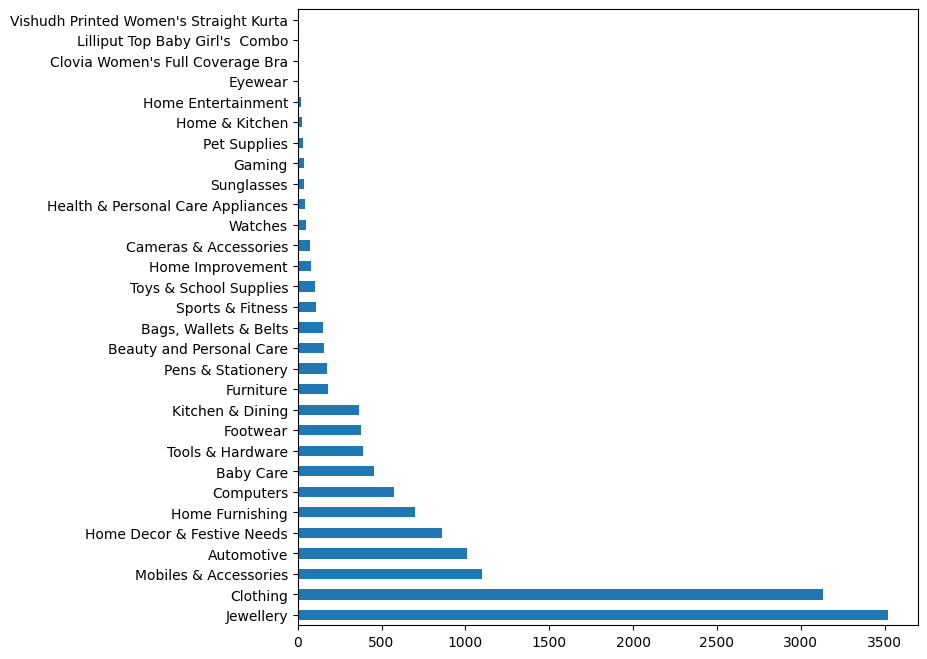

In [18]:
plt.figure(figsize=(8,8))
all_cat.sort_values(ascending = False)[:30].plot(kind = 'barh')
plt.show()

**Notice that Jewellery, clothing, mobile and accessories, and automobiles account for nearly 62% of all products.** Remember, We have limited amount of data and having many categories in a feature result in overfitting. So categories having frequency less than 50 are classified under "Other" (nearly 4%). This gives us a total of 20 categories, allowing for one hot encoding and also reduce overfitting.

In [19]:
df['Category'] = df.Category.apply(lambda x : x if(all_cat[x]>50) else 'Other')

In [20]:
all_cat_engineer = df['Category'].value_counts()
print('Total No. of Category :',df['Category'].unique().shape[0])

Total No. of Category : 20


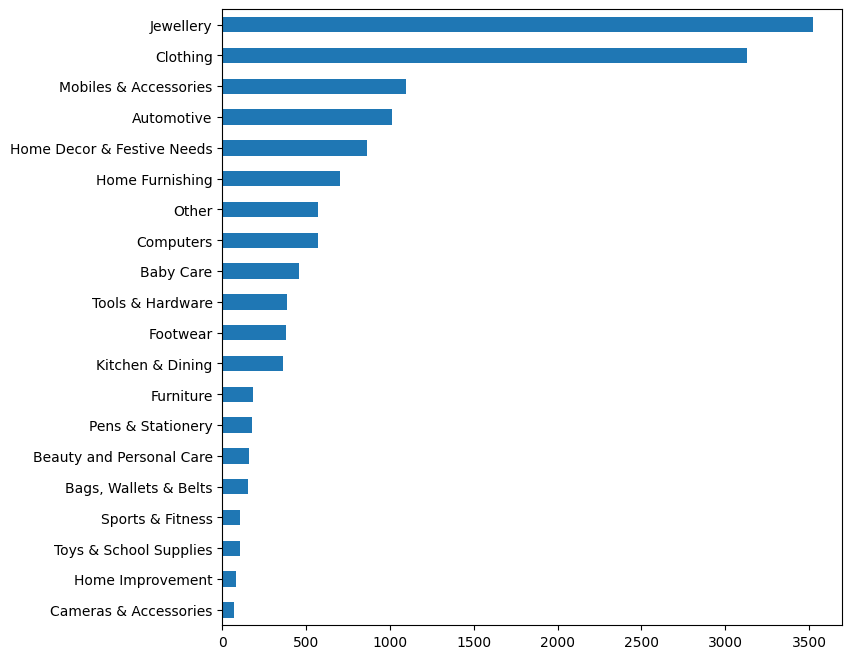

In [21]:
plt.figure(figsize=(8,8))
all_cat_engineer.sort_values().plot(kind = 'barh')
plt.show()

In [22]:
all_sub_cat = df['SubCategory'].value_counts()
print("Total No. of SubCategory :",df['SubCategory'].unique().shape[0])

Total No. of SubCategory : 4705


One-hot encoding can significantly increase the dimensionality of the feature space, resulting in a large number of columns (3480 new columns). Therefore we are using integer coding.

In [23]:
df['SubCategory'] = pd.factorize(df['SubCategory'])[0]

<Axes: >

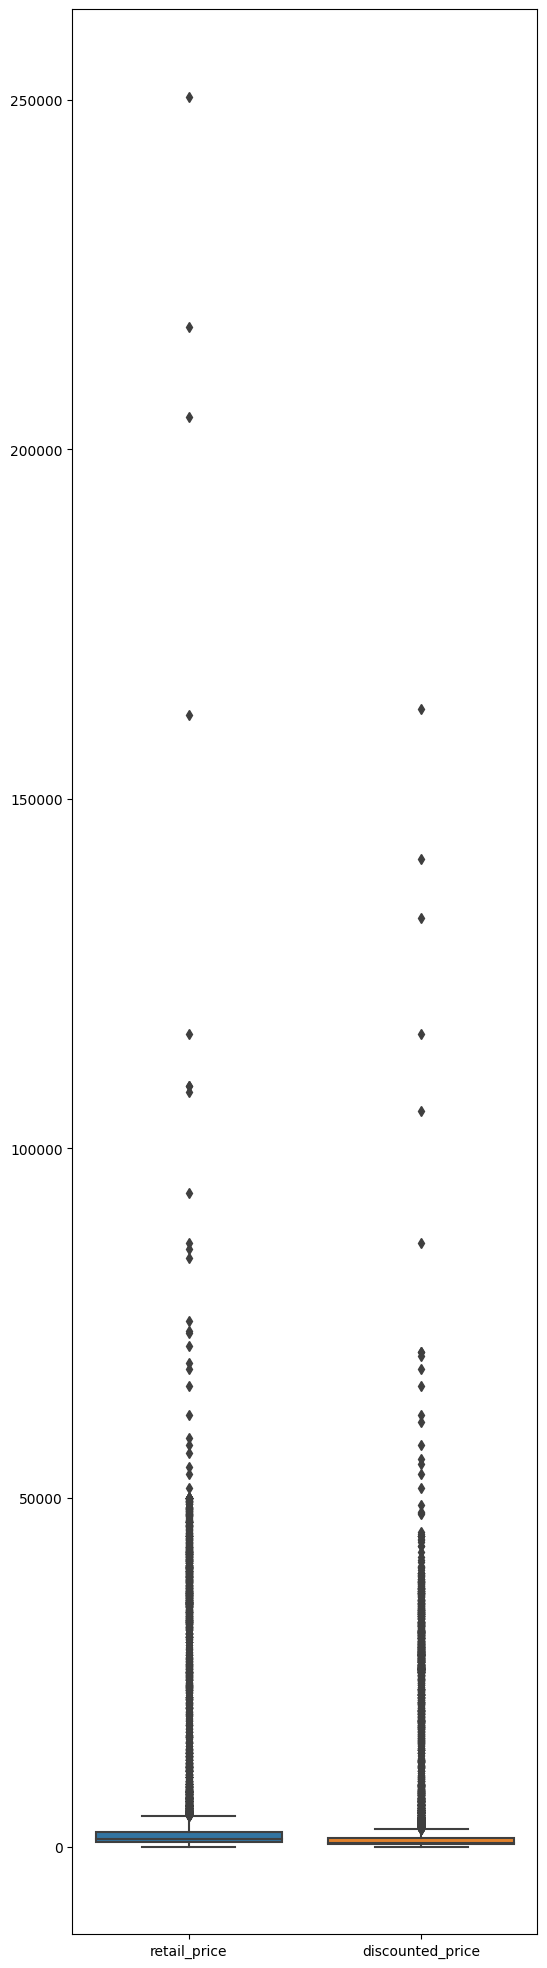

In [24]:
plt.figure(figsize = (6,25))
sns.boxplot(df[['retail_price','discounted_price']])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14071 entries, 0 to 14070
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    14071 non-null  int64              
 1   crawl_timestamp          14071 non-null  datetime64[ns, UTC]
 2   product_name             14071 non-null  object             
 3   product_category_tree    14071 non-null  object             
 4   retail_price             14071 non-null  float64            
 5   discounted_price         14071 non-null  float64            
 6   is_FK_Advantage_product  14071 non-null  bool               
 7   brand                    14071 non-null  int64              
 8   crawl_year               14071 non-null  int64              
 9   crawl_month              14071 non-null  int64              
 10  Category                 14071 non-null  object             
 11  SubCategory              140

In [26]:
df.describe()[['retail_price','discounted_price']].round(2)

,retail_price,discounted_price
count,14071.00,14071.00
mean,3639.24,2418.45
std,9268.20,6946.52
min,35.00,35.00
25%,699.00,349.00
50%,1100.00,549.00
75%,2199.00,1239.50
max,250500.00,162825.00


# Model Training


In [27]:
df = pd.get_dummies(df,columns= ['Category','crawl_year','crawl_month','is_FK_Advantage_product'])

In [28]:
df.head()

,index,crawl_timestamp,product_name,product_category_tree,retail_price,discounted_price,brand,SubCategory,Category_Automotive,Category_Baby Care,...,crawl_year_2016,crawl_month_1,crawl_month_2,crawl_month_3,crawl_month_4,crawl_month_5,crawl_month_6,crawl_month_12,is_FK_Advantage_product_False,is_FK_Advantage_product_True
0,0,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,2,2016-03-25 22:59:23+00:00,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,2,2,0,0,...,1,0,0,1,0,0,0,0,1,0
3,3,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,4,2016-03-25 22:59:23+00:00,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,3,3,0,0,...,1,0,0,1,0,0,0,0,1,0


In [29]:
X = df.iloc[:,6:]
Y = df.iloc[:,4:5]

In [30]:
X_train,X_test,Y_train,Y_test   = train_test_split(X,Y,train_size = 0.95,random_state = 42)

In [31]:
model = xgb.XGBRegressor(eval_metric = 'rmse')
parameter = {'learning_rate' : [0.1,0.01],
             'n_estimators'  : [300,400],
             'max_depth'     : [3,5,7]
}
grid_search = GridSearchCV(estimator = model,param_grid = parameter,scoring = 'neg_mean_squared_error',verbose = 1)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [300, 400]},
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
print("Best parameters :",grid_search.best_params_)
print("Best Score :" ,grid_search.best_score_)

Best parameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
Best Score : -16504300.162519146


In [33]:
Y_test_pred = grid_search.predict(X_test)

In [36]:
print(grid_search.predict(X_train))
print(Y_train[:5])

[  953.7265  28849.752     630.47974 ...   818.9821   1293.3303
   746.2345 ]
       retail_price
13076         294.0
11865       14077.0
5006          549.0
8729          750.0
11324        1999.0


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  42401657.06883557
Mean Absolute Error:  1454.8264192234385
R-squared:  0.6906469416515735


In [42]:
best_model = grid_search.best_estimator_
best_model.save_model('/content/drive/MyDrive/model.bin')